# Imports 

In [1]:
# pip install pretty_midi

In [2]:
# All imports needed for this research, and mount to my google drive where data was stored
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from music21 import *
import re
from google.colab import files
import os
import math
import music21
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn import tree
drive.mount('/content/drive')

Mounted at /content/drive


# Import midi files from google drive 
  

In [ ]:
# All MIDI files were stored on my google drive, therefore some functions need to be applied to extract these from google drive and convert them to midi21 objects
# ------------------------------------------- 
base_midi = []
survey_songs = []

# Google drive links
survey_song = os.listdir('/content/drive/MyDrive/Music and AI: Composing music as a logical modeling problem/Surveysongsmidifiles/')
classical_songs = os.listdir('/content/drive/MyDrive/Music and AI: Composing music as a logical modeling problem/Composersmidifiles/')
pop_songs = os.listdir('/content/drive/MyDrive/Music and AI: Composing music as a logical modeling problem/Popsongsmidifiles/')

# ------------------------------------------- 
#Functions to extract songs from google drive and convert them to music21 Objects
def extract_survey_songs(song):
  string = '/content/drive/MyDrive/Music and AI: Composing music as a logical modeling problem/Surveysongsmidifiles/' + song
  survey_songs.append((converter.parse(string), song))

def extract_classical_songs(composer):
  string = '/content/drive/MyDrive/Music and AI: Composing music as a logical modeling problem/Composersmidifiles/' + composer + '/'
  folder = os.listdir(string)
  for song in folder:
    string_song = string + song
    base_midi.append((converter.parse(string_song), song))

def extract_pop_songs(song):
  string = '/content/drive/MyDrive/Music and AI: Composing music as a logical modeling problem/Popsongsmidifiles/' + song
  print(song)
  try: 
    base_midi.append((converter.parse(string), song))
  except:
    pass

# -------------------------------------------
#For loops to extract songs from different google drive links
for i in survey_song:
  extract_survey_songs(i)
  
for i in classical_songs:
  extract_classical_songs(i)

for i in pop_songs:
  extract_pop_songs(i)

/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=5, channel=None, data=b'Copyright \xa9 2009 by Bernd Krueger'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 2000 by Bernd Kr\xfcger'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 1997 by Bernd Kr\xfcger'>; getting generic Instrument
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiE

# Feature functions

In [ ]:

# Function to analyze the key of a song 
def analyze_key(song):
  print(song)
  key = str(song[0].analyze('key'))
  return key

# Function to extraxt the key confidence of a song 
def music_key_confidence(song):
  music_analysis = song[0].analyze('key')
  key_confidence = music_analysis.correlationCoefficient
  return key_confidence
 
# Function to extract the minimal pitch of a song 
def min_pitch(song):
  notes = song[0].flat.getElementsByClass(music21.note.Note)
  min_pitch = min([note.pitch.midi for note in notes])
  # pitch = music21.pitch.Pitch(min_pitch)
  # musical_note = pitch.name
  # octave = pitch.octave
  # min_pitch_note = "{m}{o}".format(m=musical_note, o=octave)
  return(min_pitch)

# Function to extract the maximal pitch of a song 
def max_pitch(song):
  notes = song[0].flat.getElementsByClass(music21.note.Note)
  max_pitch = max([note.pitch.midi for note in notes])
  # pitch = music21.pitch.Pitch(max_pitch)
  # musical_note = pitch.name
  # octave = pitch.octave
  # max_pitch_note = "{m}{o}".format(m=musical_note, o=octave)
  return max_pitch

# Function to extract the pitch range of a song
def pitch_range(song):
  notes = song[0].flat.getElementsByClass(music21.note.Note)
  min_pitch = min([note.pitch.midi for note in notes])
  max_pitch = max([note.pitch.midi for note in notes])
  pitch_range = max_pitch - min_pitch 
  return pitch_range

# Function to extract the velocity of a song
def velocity(song):
  notes = song[0].flat.getElementsByClass(music21.note.Note)
  mean_velocity = sum([note.volume.velocity for note in notes])/len(notes)
  return mean_velocity

# Function to extraxt the time signature of a song 
def time_signature(song):
  timeSignature = song[0].getTimeSignatures()[0] 
  name_of_song = song[1]
  time_signature = "{0}/{1}".format(timeSignature.beatCount, timeSignature.denominator)
  return time_signature

# Funtcion to extract the bpm of a song 
def find_bpm(song):
  tempo = song[0].flat.getElementsByClass(music21.tempo.MetronomeMark)[0]
  bpm = tempo.number
  return bpm

# ------------------------------------------- 
# Function to extraxt number_of_instruments in a song 
def number_instruments(song):
  number_of_instruments = len(song[0])
  return number_of_instruments

# Function to extract alternative keys of a song
# Werkt nog niet (niet nodig)
def alternative_keys(song):
  alternative_keys = []
  music_analysis = song[0].analyze('key')
  for analysis in music_analysis.alternateInterpretations:
      if (analysis.correlationCoefficient > 0.5):
          alternative_keys.append(str(analysis))
  key_analysis.append((alternative_keys, song[1]))

# Function to extract the duration of a song
def duration(song):
  tempo = song[0].flat.getElementsByClass(music21.tempo.MetronomeMark)[0]
  duration = song[0].flat.duration.quarterLength / tempo.number
  print(song[0].flat.duration.quarterLength)
  print(duration)

# Function  to extract all instruments used in a song
# Werkt nog niet (niet nodig)
instruments_each_song = []
all_data = []

def all_instruments(song):
  list_of_instruments = []
  element = (instrument.partitionByInstrument(song))
  for gear in song:
    list_of_instruments.append(gear.partName)
  instruments_each_song.append((list_of_instruments, song[1]))

def instruments(songs):
  element = (instrument.partitionByInstrument(songs[0]), songs[1])
  for song in element:
    all_instruments(song[0])
  for instruments, title in instruments_each_song:
    d = {"name": title}
    for i in instruments:
        if not i is None:
            d[i] = 1
    all_data.append(d)
  df_instruments = pd.DataFrame(all_data).fillna(0).set_index("name").astype(int)
  return df_instruments

# Survey dataframe


In [ ]:
features = []

# For loop to extract feature's from the pusical pieces used within the survey
for song in survey_songs:
  try:
    key = analyze_key(song)
  except:
    pass
  try:
    key_confidence = music_key_confidence(song)
  except:
    pass
  minimal_pitch  = min_pitch(song)
  maximal_pitch = max_pitch(song)
  range_of_pitch = pitch_range(song)
  rhythm  = time_signature(song)
  bpm = int(find_bpm(song))
  vel = int(velocity(song))
  features.append((key, key_confidence, minimal_pitch, maximal_pitch, range_of_pitch, rhythm, bpm, vel, song[1]))

# Creating the Panda Dataframe for the musical pieces used in the survey
features_survey_dataframe = pd.DataFrame(features, columns = ['key', 'key confidence', 'min pitch', 'max pitch', 'pitch_range', 'time signature','bpm', 'velocity', 'name'])
features_survey_dataframe.set_index('name', inplace = True)
boolean_survey_dataframe = pd.get_dummies(data=features_survey_dataframe , columns=['key', 'time signature'])
display(boolean_survey_dataframe )


(<music21.stream.Score 0x7f0b6715e140>, 'Beethoven - opus22 4.mid')
(<music21.stream.Score 0x7f0b67aca1a0>, 'Borodin - ps7.mid')
(<music21.stream.Score 0x7f0b650006d0>, 'Chopin  - op18.mid')
(<music21.stream.Score 0x7f0b63947190>, 'Cyndi Lauper - True Colors.mid')
(<music21.stream.Score 0x7f0b63a2d870>, 'Frank Mills - Musicbox Dancer.mid')
(<music21.stream.Score 0x7f0b62687370>, 'George Benson - On Broadway.mid')
(<music21.stream.Score 0x7f0b634306d0>, 'Grieg - Voeglein.mid')
(<music21.stream.Score 0x7f0b64ac0bb0>, 'Mozart - 333 3.mid')
(<music21.stream.Score 0x7f0b66fe58d0>, 'The Corrs - Dreams.mid')
(<music21.stream.Score 0x7f0b65e86320>, 'ABBA - Money Money Money.mid')


,key confidence,min pitch,max pitch,pitch_range,bpm,velocity,key_A- major,key_B- major,key_F# major,key_d minor,time signature_2/4,time signature_2/8,time signature_3/4,time signature_4/4
name,,,,,,,,,,,,,,
Beethoven - opus22 4.mid,0.915128,29,89,60,85,48,0,1,0,0,1,0,0,0
Borodin - ps7.mid,0.826493,35,81,46,81,45,0,0,1,0,0,0,0,1
Chopin - op18.mid,0.817137,37,99,62,208,53,1,0,0,0,0,0,1,0
Cyndi Lauper - True Colors.mid,0.817137,41,81,40,90,103,1,0,0,0,0,0,0,1
Frank Mills - Musicbox Dancer.mid,0.817137,31,91,60,125,103,1,0,0,0,0,0,0,1
George Benson - On Broadway.mid,0.817137,26,86,60,135,111,1,0,0,0,0,0,0,1
Grieg - Voeglein.mid,0.778859,33,93,60,176,57,0,0,0,1,0,1,0,0
Mozart - 333 3.mid,0.959484,36,89,53,165,64,0,1,0,0,0,0,0,1
The Corrs - Dreams.mid,0.959484,26,84,58,125,96,0,1,0,0,0,0,0,1


# Pitch (Analyze all alternative keys a musical piece could have)



In [ ]:
key_analysis = []
# ------------------------------------------- 
# Function to extract alternative keys
def alternative_keys(song):
 
  alternative_keys = []
  music_analysis = song[0].analyze('key')
  for analysis in music_analysis.alternateInterpretations:
      if (analysis.correlationCoefficient > 0.5):
          alternative_keys.append(str(analysis))
  key_analysis.append((alternative_keys, song[1]))

# ------------------------------------------- 
# For loop to extract alternative keys 
for song in survey_songs:
  alternative_keys(song)

# ------------------------------------------- 
# Creating a dataframe with all instruments used in each song
all_data = []
for alternative_keys, title in key_analysis:
    d = {"name": title}
    for i in alternative_keys:
        if not i is None:
            d[i] = 1
    all_data.append(d)

df_alternative_keys = pd.DataFrame(all_data).fillna(0).set_index("name").astype(int)
print(df_alternative_keys)

# Duration (Analyze the duration of each musical piece)


In [ ]:
all_durations = []

# ------------------------------------------- 
# #Function to extract the duration of a song in quarter notes
# def duration(song):
#   duration = song[0].duration.quarterLength
#   all_durations.append((duration, song[1]))

# # ------------------------------------------- 
# #for loop to extract the duration of each song
# for song in survey_songs:
#   duration(song)

# ------------------------------------------- 
#Function to extract the duration of a song in quarter notes
def duration(song):
  tempo = song[0].flat.getElementsByClass(music21.tempo.MetronomeMark)[0]
  duration = song[0].flat.duration.quarterLength / tempo.number
  print(song[0].flat.duration.quarterLength)
  print(duration)

# ------------------------------------------- 
#for loop to extract the duration of each song
for song in survey_songs:
  duration(song)

# ------------------------------------------- 
#Dataframe of duration each song
df_duration = pd.DataFrame(all_durations , columns = ['duration', 'name'])
df_duration.set_index('name', inplace = True)
df_duration

398.0
4.654970760233918
172.0
2.1216232885160973
1075.5
5.168933531984428
319.75
3.5527777777777776
344.0
2.752
437.0
3.237037037037037
192.25
1.091089670828604
912.0
5.527272727272727
494.5
3.956
367.75
3.064583333333333


,duration
name,


In [ ]:
# ------------------------------------------- 
def duration(song):
  duration = 0
  for element in song[0].flat:
    if 'Note' in element.classes or 'Chord' in element.classes:
      duration +=element.duration.quarterLength
  
  tempo = song[0].flat.getElementsByClass(music21.tempo.MetronomeMark)[0]
  bpm = tempo.number
  duration_in_seconds = duration * 60 / bpm

  print((duration_in_seconds, song[1]))

# ------------------------------------------- 
for song in survey_songs:
  duration(song)


(550.7602339181286, 'Beethoven - opus22 4.mid')
(337.9795238682618, 'Borodin - ps7.mid')
(486.2546258470688, 'Chopin  - op18.mid')
(723.9444444444475, 'Cyndi Lauper - True Colors.mid')
(518.0000000000001, 'Frank Mills - Musicbox Dancer.mid')
(743.7037037037032, 'George Benson - On Broadway.mid')
(48.86492622020432, 'Grieg - Voeglein.mid')
(551.3333333333326, 'Mozart - 333 3.mid')
(1112.2399999999986, 'The Corrs - Dreams.mid')
(632.3750000000005, 'ABBA - Money Money Money.mid')


# Number of instruments (Analyze the number of instruments present in each muiscal piece
)

In [ ]:
list_number_of_instruments = []

# ------------------------------------------- 
# Function to extraxt number_of_instruments in a song (check)
def list_instruments(song):
  number_of_instruments = len(song[0])
  list_number_of_instruments.append((number_of_instruments, song[1]))

# ------------------------------------------- 
for song in survey_songs:
  list_instruments(song)

# ------------------------------------------- 
print(list_number_of_instruments)
df_number_of_instruments = pd.DataFrame(list_number_of_instruments, columns = ['number of instruments', 'name'])
df_number_of_instruments.set_index('name', inplace=True)
df_number_of_instruments

[(2, 'Beethoven - opus22 4.mid'), (2, 'Borodin - ps7.mid'), (2, 'Chopin  - op18.mid'), (5, 'Cyndi Lauper - True Colors.mid'), (6, 'Frank Mills - Musicbox Dancer.mid'), (8, 'George Benson - On Broadway.mid'), (2, 'Grieg - Voeglein.mid'), (2, 'Mozart - 333 3.mid'), (1, 'The Corrs - Dreams.mid'), (8, 'ABBA - Money Money Money.mid')]


,number of instruments
name,
Beethoven - opus22 4.mid,2
Borodin - ps7.mid,2
Chopin - op18.mid,2
Cyndi Lauper - True Colors.mid,5
Frank Mills - Musicbox Dancer.mid,6
George Benson - On Broadway.mid,8
Grieg - Voeglein.mid,2
Mozart - 333 3.mid,2
The Corrs - Dreams.mid,1


# Timbre (Analyze all the different instruments present in musical piece)

In [ ]:
from pandas.core.groupby.generic import DataFrameGroupBy
from pandas.io.formats.info import DataFrameInfo
from music21 import *

# ------------------------------------------- 
instruments_each_song = []

# ------------------------------------------- 
# Functions to extract instruments from midi files and number of instruments
def list_instruments(song):
     list_of_instruments = []
     number_of_instruments = len(song[0])
     name_of_song = song[1]
     for instrument in song[0]:
         list_of_instruments.append(instrument.partName)
     instruments_each_song.append((list_of_instruments, song[1]))

for song in survey_songs:
   elem = ((instrument.partitionByInstrument(song[0]), song[1]))
   list_instruments(elem)

#----------------------------------------------------------------------------------
# Boolean Dataframe instruments
all_data = []
for instruments, title in instruments_each_song:
    d = {"name": title}
    for i in instruments:
        if not i is None:
            d[i] = 1
    all_data.append(d)

df_instruments = pd.DataFrame(all_data).fillna(0).set_index("name").astype(int)
print(df_instruments)

                                   Piano  Guitar  StringInstrument  \
name                                                                 
Beethoven - opus22 4.mid               1       0                 0   
Borodin - ps7.mid                      1       0                 0   
Chopin  - op18.mid                     1       0                 0   
Cyndi Lauper - True Colors.mid         0       1                 1   
Frank Mills - Musicbox Dancer.mid      1       0                 1   
George Benson - On Broadway.mid        1       0                 0   
Grieg - Voeglein.mid                   1       0                 0   
Mozart - 333 3.mid                     1       0                 0   
The Corrs - Dreams.mid                 1       0                 0   
ABBA - Money Money Money.mid           1       0                 0   

                                   Acoustic Bass  Fretless Bass  \
name                                                              
Beethoven - opus22 4.mid 

# Survey 



In [ ]:
# Import data collected by the survey
uploaded = files.upload()

Saving survey.csv to survey.csv


In [ ]:
# Reed the data collected by the survey
df = pd.read_csv('survey.csv')

In [ ]:
# Rename all the columns to the corresponding name of the song
df.rename(columns = {'Horodateur': 'Timestamp',
                     'Which color do you associate with Track 1': 'The Corrs - Dreams',
                     'Which color do you associate with Track 2?': 'Mozart - 333 3',
                     'Which color do you associate with Track 3?': 'Beethoven - opus22 4',
                     'Which color do you associate with Track 4?': 'Chopin  - op18', 
                     'Which color do you associate with Track 5?': 'Frank Mills - Musicbox Dancer',
                     'Which color do you associate with Track 6?': 'Borodin - ps7',
                     'Which color do you associate with Track 7?': 'Cyndi Lauper - True Colors',
                     'Which color do you associate with Track 8?': 'George Benson - On Broadway',
                     'Which color do you associate with Track 9?': 'Grieg - Voeglein',
                     'Which color do you associate with Track 10?': 'ABBA - Money Money Money',
                     'How old are you': "Age",
                     'What is your gender': 'Gender',}, inplace = True)

In [ ]:
# Drop the columns not relevant for this research
df = df.drop(columns = ['Timestamp', 'Age', 'Gender'])

In [ ]:
# Returns how many time participant did vote for a certain color
all_genders_colors = df.copy()
all_genders_colors = all_genders_colors.apply(pd.value_counts)
all_genders_colors = all_genders_colors.fillna(0)

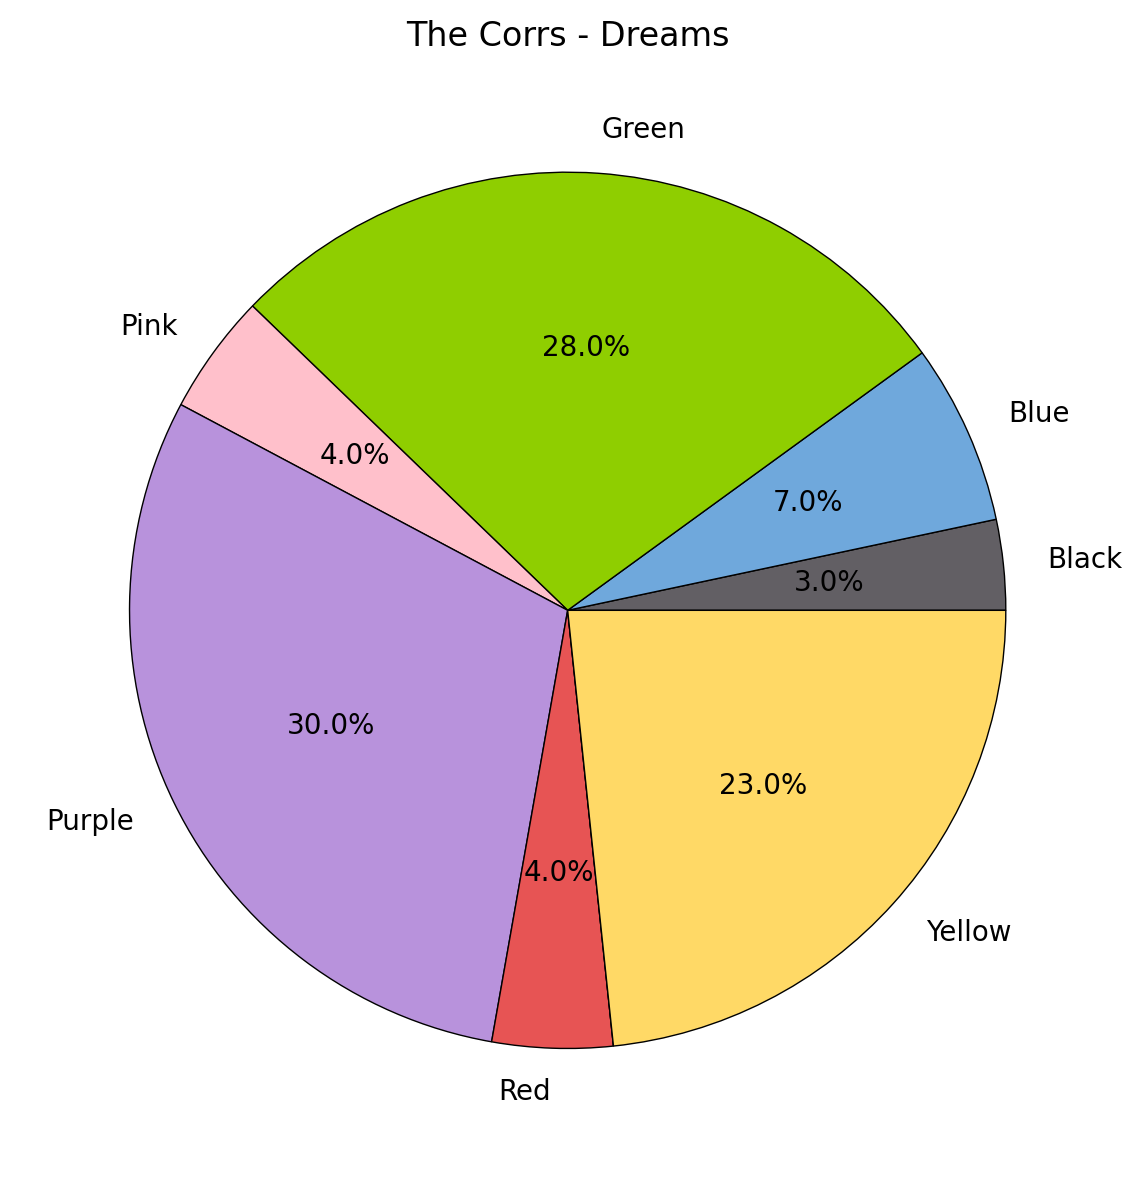

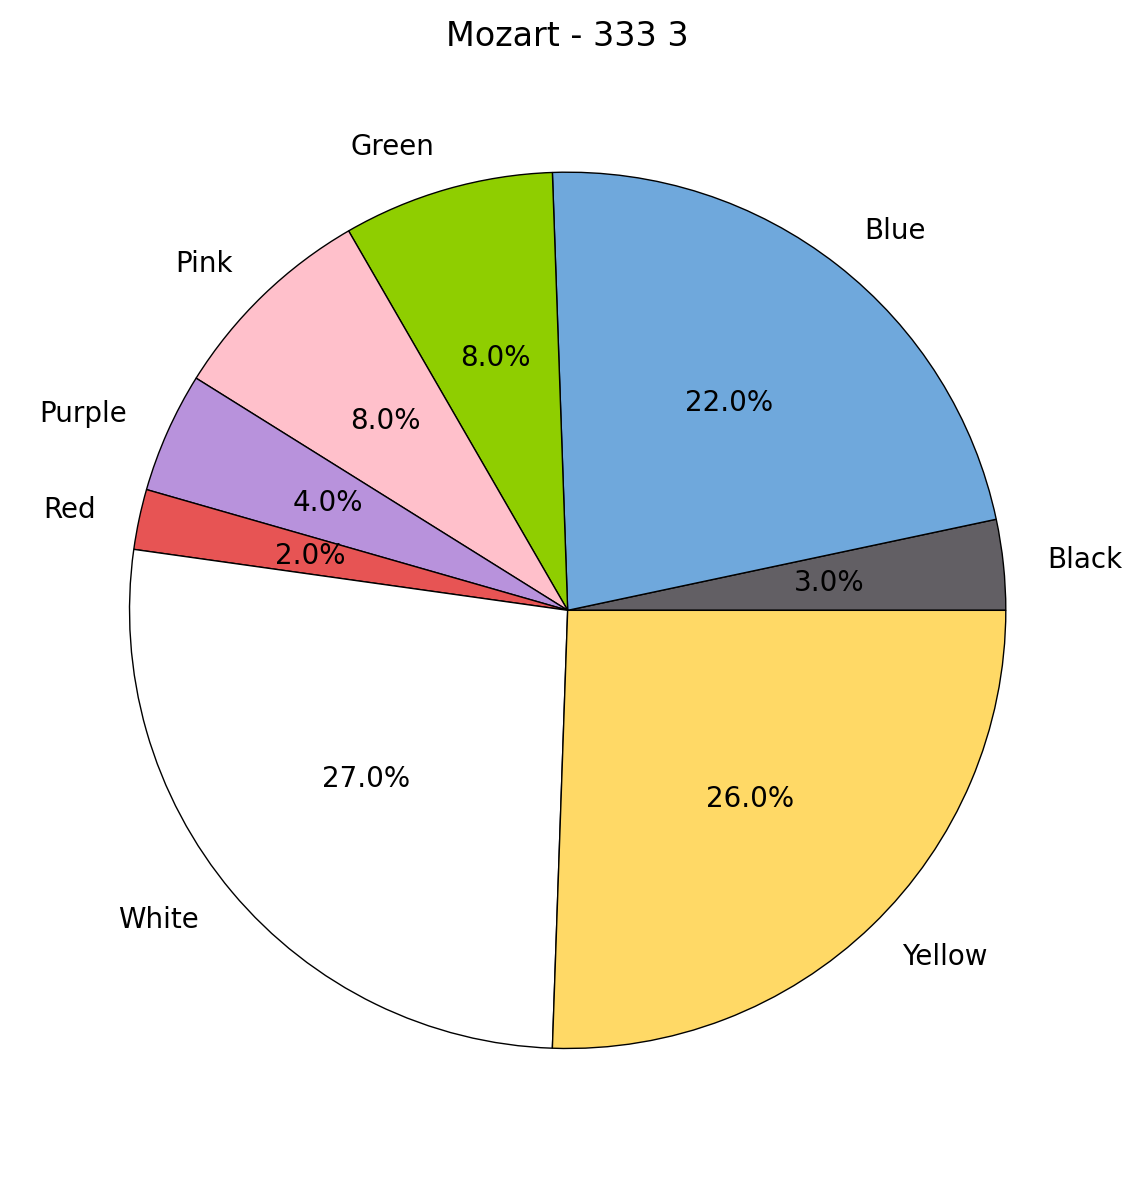

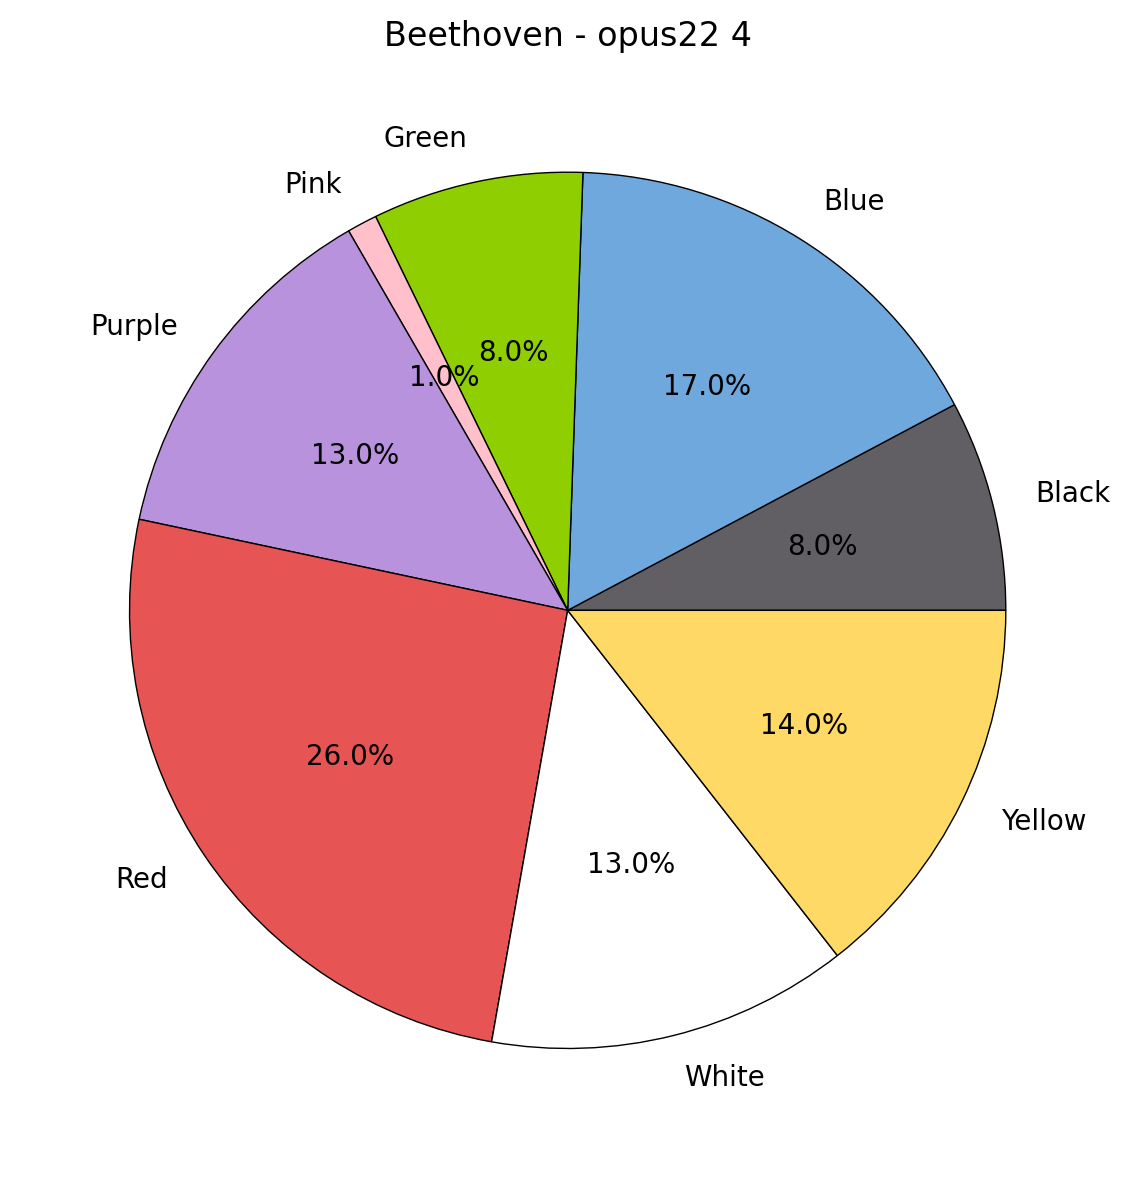

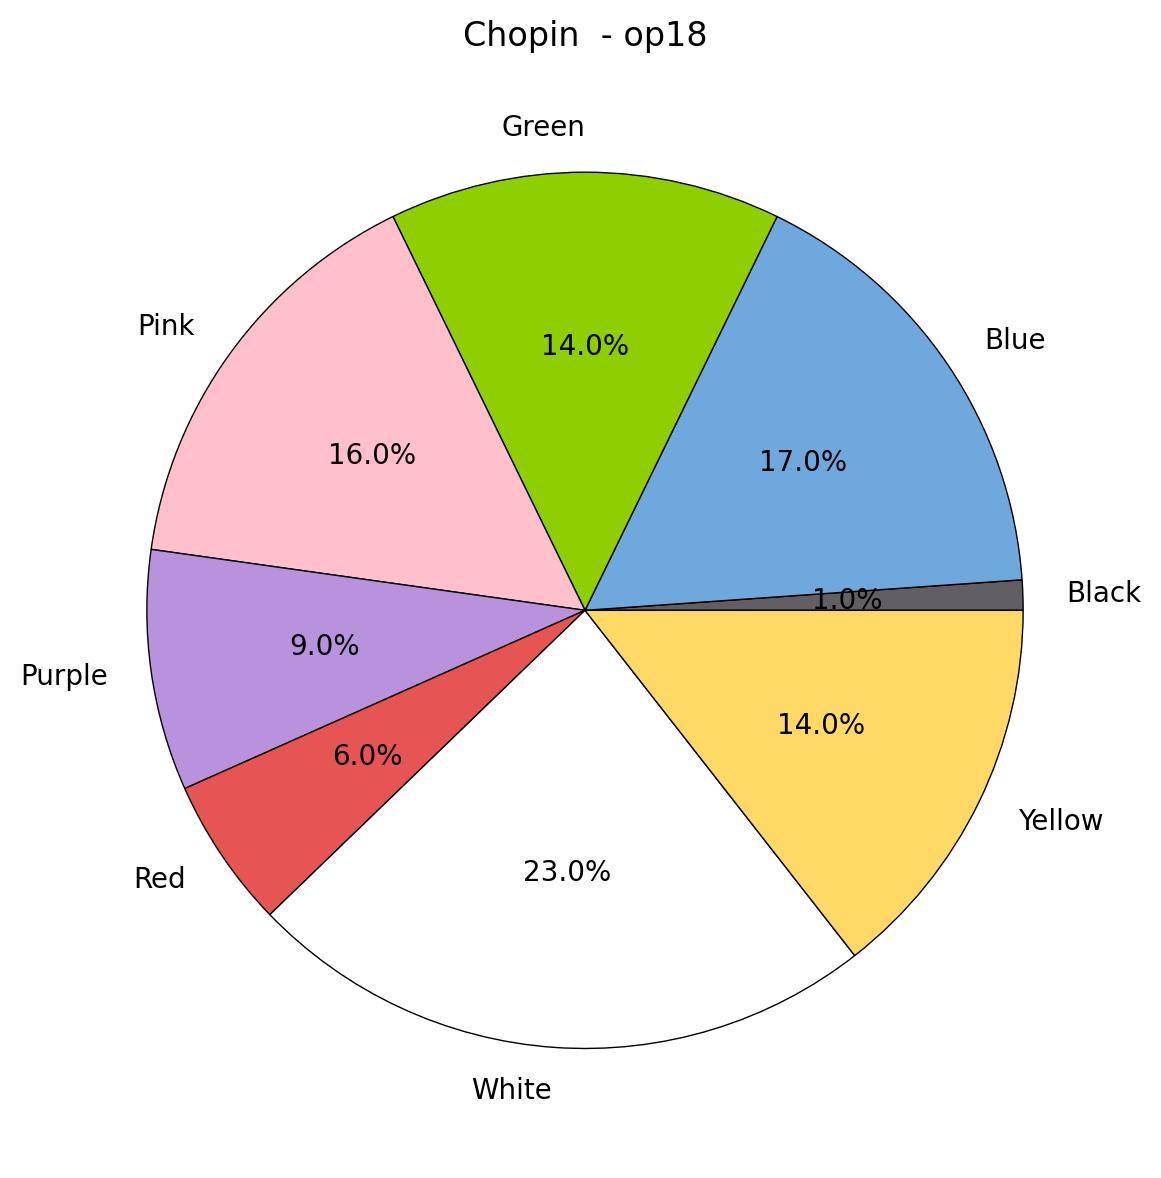

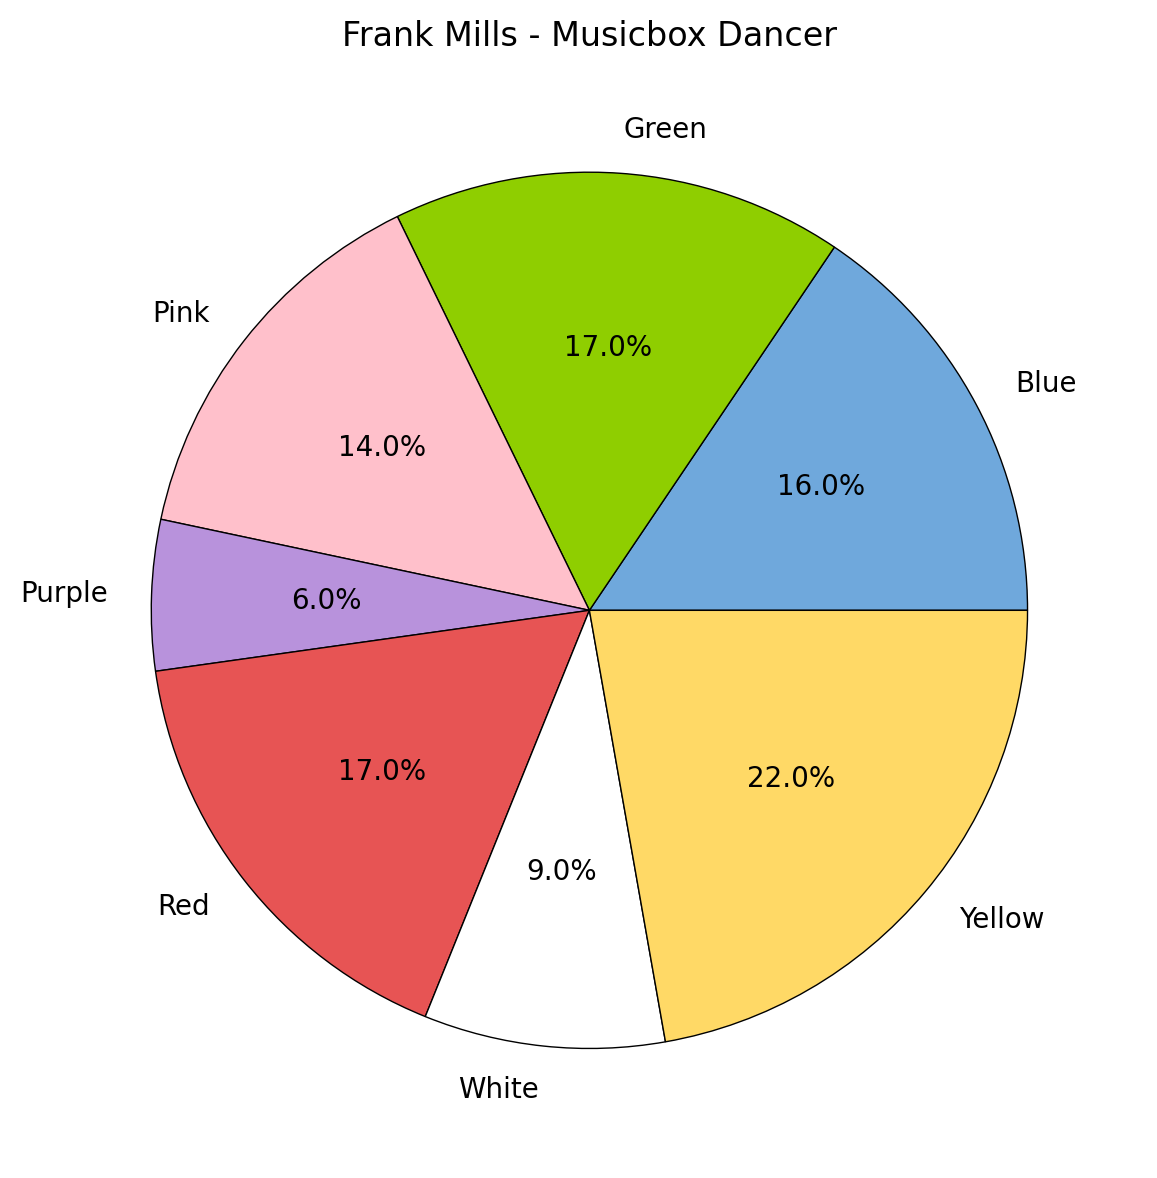

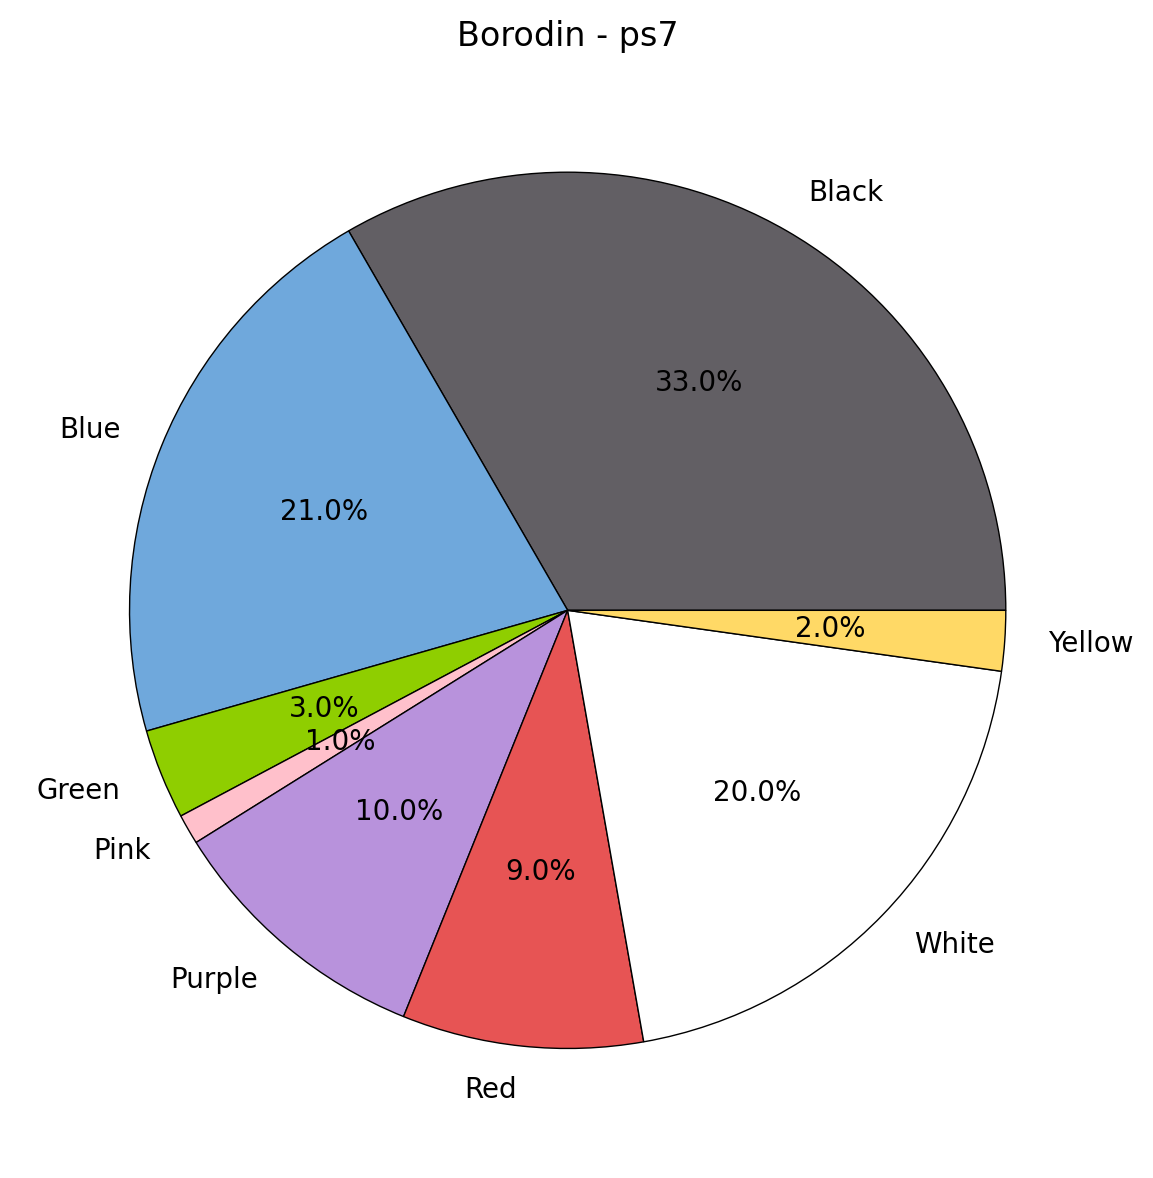

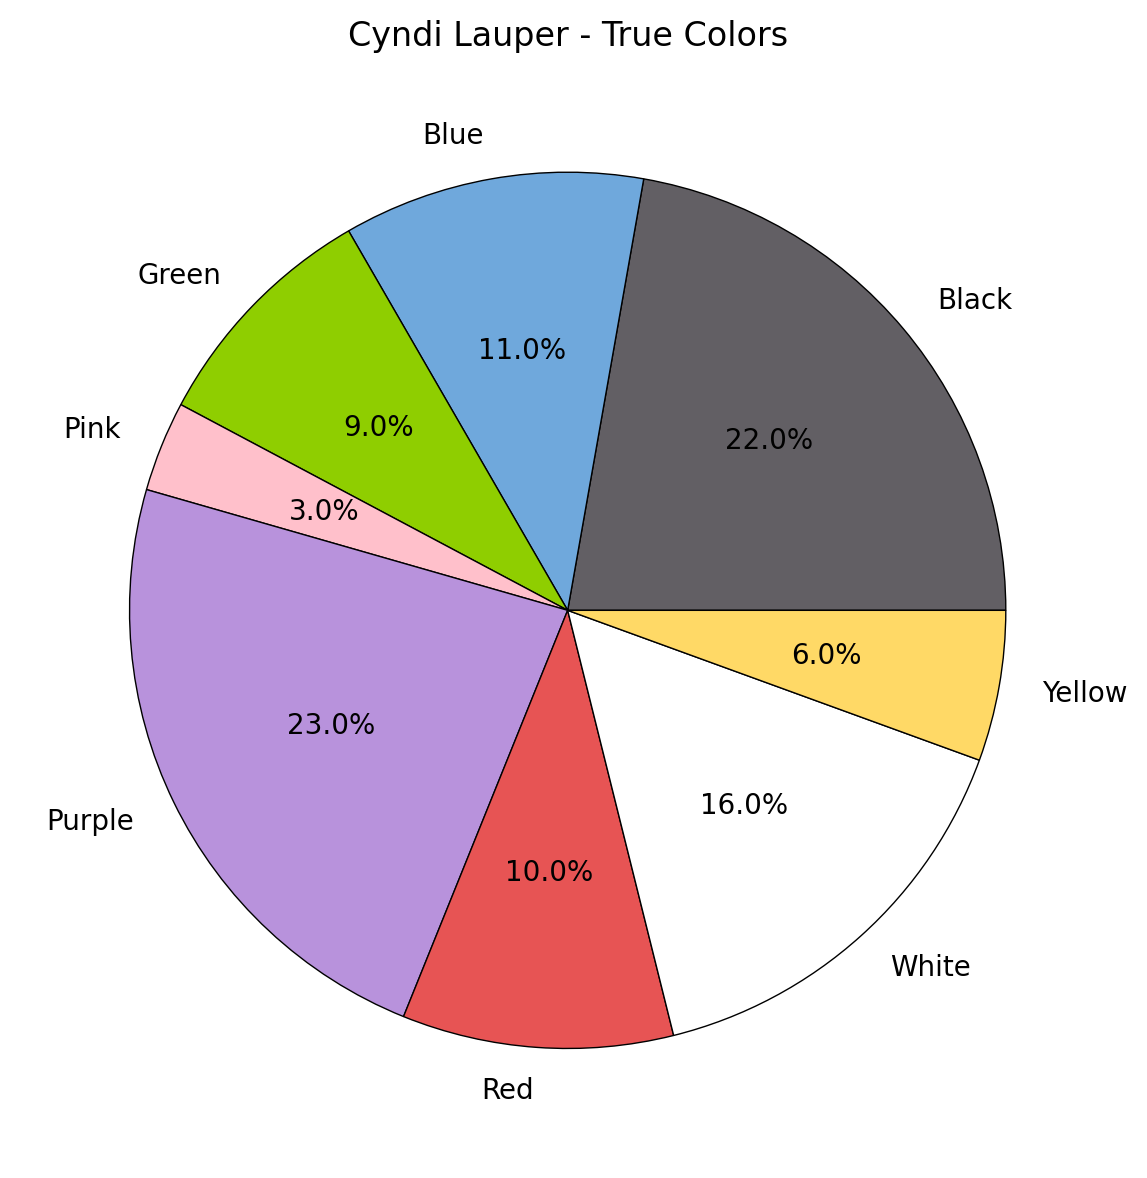

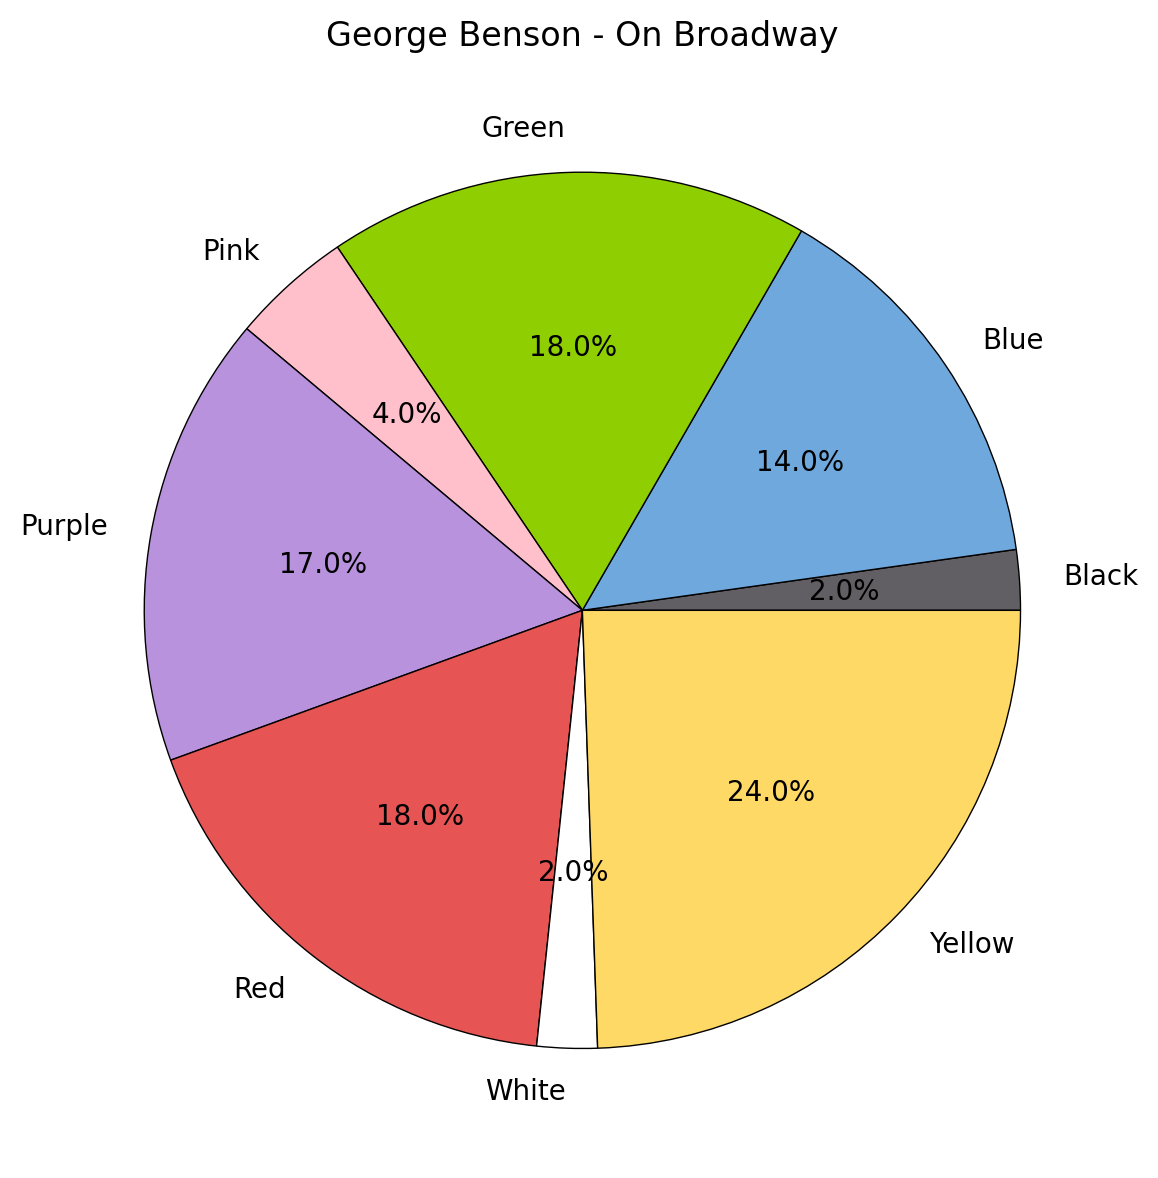

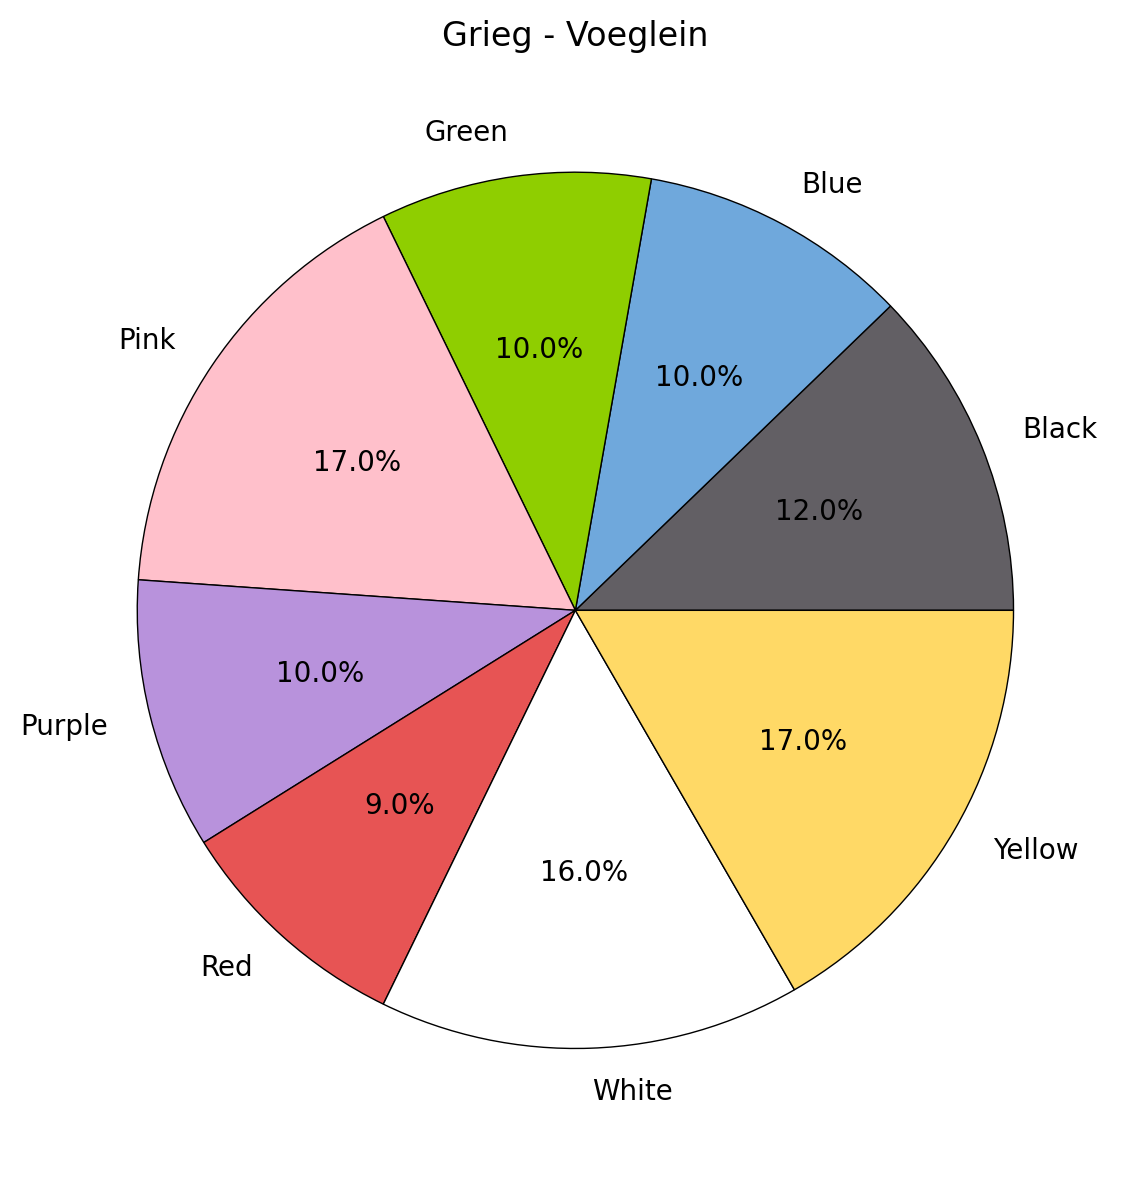

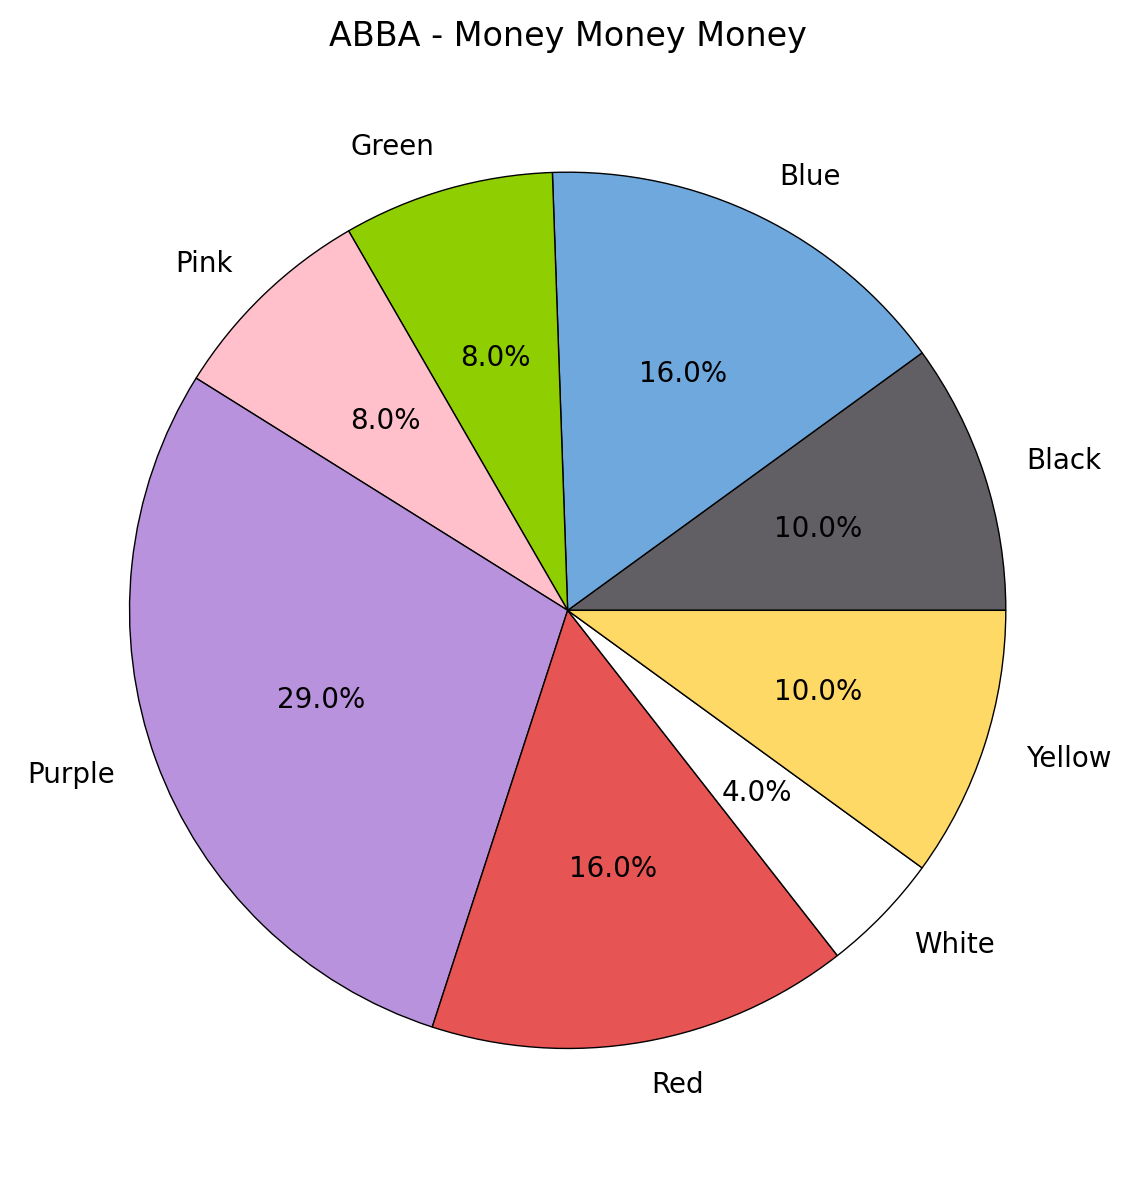

In [ ]:
# Create pie charts for each song used within the survey
for column in all_genders_colors:
    fig, (ax1) = plt.subplots(1, 1,  figsize=(18,6))

    all_genders_colors.plot.pie( 
                            y = all_genders_colors[column].name,
                            colors = ['#625f64', '#6fa8dc', '#8fce00','Pink', '#b892dc' , '#e75454', 'White', '#ffd966'],
                            legend = False,
                            subplots = True,
                            label = '',
                            wedgeprops = {"edgecolor":"k", "linewidth": 0.5, "linestyle": "solid", "antialiased": True},
                            autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else "",
                            ax = ax1)
  
    ax1.set_title(column)
    plt.tight_layout()
    nameFigure = "{}_Gender_color.png".format(column)
    plt.savefig(nameFigure)


In [ ]:
# Creates a dataframe with the color that is most present of each song
color_each_song = []

for column in all_genders_colors:
  name  = column + '.mid'
  color_each_song.append((all_genders_colors[column].idxmax(), name))

color_each_song

df_color = pd.DataFrame(color_each_song, columns = ['Color', 'name'])
df_color.set_index('name', inplace=True)

#  Dataframe survey with color


In [ ]:
# Merges the color dataframe and feature dataframe of the survey together, and apllies one-hot-encoding to some features of this dataframe
features_survey_dataframe_with_color = pd.merge(features_survey_dataframe, df_color, on='name')
pd.get_dummies(features_survey_dataframe_with_color, columns=['key', 'time signature'])

,key confidence,min pitch,max pitch,pitch_range,bpm,velocity,Color,key_A- major,key_B- major,key_F# major,key_d minor,time signature_2/4,time signature_2/8,time signature_3/4,time signature_4/4
name,,,,,,,,,,,,,,,
Beethoven - opus22 4.mid,0.915128,29,89,60,85,48,Red,0,1,0,0,1,0,0,0
Borodin - ps7.mid,0.826493,35,81,46,81,45,Black,0,0,1,0,0,0,0,1
Chopin - op18.mid,0.817137,37,99,62,208,53,White,1,0,0,0,0,0,1,0
Cyndi Lauper - True Colors.mid,0.817137,41,81,40,90,103,Purple,1,0,0,0,0,0,0,1
Frank Mills - Musicbox Dancer.mid,0.817137,31,91,60,125,103,Yellow,1,0,0,0,0,0,0,1
George Benson - On Broadway.mid,0.817137,26,86,60,135,111,Yellow,1,0,0,0,0,0,0,1
Grieg - Voeglein.mid,0.778859,33,93,60,176,57,Pink,0,0,0,1,0,1,0,0
Mozart - 333 3.mid,0.959484,36,89,53,165,64,White,0,1,0,0,0,0,0,1
The Corrs - Dreams.mid,0.959484,26,84,58,125,96,Purple,0,1,0,0,0,0,0,1


# Extracting feature's

In [ ]:
#Google drive link
google_drive_link = 'content/drive/MyDrive/Music and AI: Composing music as a logical modeling problem/Greenmidifiles/' 
music_google_drive = os.listdir('/content/drive/MyDrive/Music and AI: Composing music as a logical modeling problem/Greenmidifiles/')
all_music = []
all_music_pretty_midi = [] 
color = 'Green'
Name_to_save_data = 'Green'

# -------------------------------------------
#function to extract from google drive
def extract_songs(song):
  string = '/content/drive/MyDrive/Music and AI: Composing music as a logical modeling problem/Greenmidifiles/' + song
  all_music.append([converter.parse(string), song])
 
# -------------------------------------------
#For loops to extract songs from google drive links
for song in music_google_drive:
  extract_songs(song)
  # try:
  #   extract_songs(song)
  # except:
  #   print(song, "werkt niet")


In [ ]:
features_2 = []

for song in all_music:
  key = analyze_key(song)
  key_confidence = music_key_confidence(song)
  minimal_pitch  = min_pitch(song)
  maximal_pitch = max_pitch(song)
  range_of_pitch = pitch_range(song)
  rhythm  = time_signature(song)
  # bpm = int(find_bpm(song))
  try:
    bpm = int(find_bpm(song))
  except:
    pass
  number_of_instruments = list_instruments(song)
  vel = int(velocity(song))
  features_2.append((key, key_confidence, minimal_pitch, maximal_pitch, range_of_pitch, rhythm, bpm , vel, song[1]))


# Dataframe
features_dataframe_2 = pd.DataFrame(features_2, columns = ['key', 'key confidence', 'min pitch', 'max pitch', 'pitch_range', 'time signature', 'bpm', 'velocity', 'name'])
features_dataframe_2.set_index('name', inplace = True)


In [ ]:
features_dataframe_2.insert(loc = len(features_dataframe_2.columns),
          column = 'Color',
          value = color)

In [ ]:
boolean_dataframe = pd.get_dummies(data=features_dataframe_2, columns=['key', 'time signature'])
display(boolean_dataframe)
csv_data = boolean_dataframe.to_csv(Name_to_save_data)

,key confidence,min pitch,max pitch,pitch_range,bpm,velocity,Color,key_A major,key_A- major,key_B- major,...,key_e minor,key_f minor,key_g minor,time signature_1/4,time signature_1/8,time signature_2/2,time signature_2/4,time signature_2/8,time signature_3/4,time signature_4/4
name,,,,,,,,,,,,,,,,,,,,,
greensl(1).mid,0.894940,0,76,76,130,69,Green,0,0,0,...,1,0,0,0,0,0,0,0,0,1
greensl3.mid,0.895886,35,76,41,130,75,Green,0,0,0,...,1,0,0,0,0,0,0,0,0,1
Dance from the Brook Green suite.mid,0.860826,36,84,48,156,75,Green,0,0,0,...,0,0,0,0,0,0,0,1,0,0
green_atlas__circulation__djrenco.mid,0.765802,50,66,16,141,100,Green,0,0,0,...,0,0,0,0,0,0,0,0,0,1
GreenHornet.mid,0.823899,33,77,44,164,100,Green,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Greenman2.mid,0.778247,36,96,60,120,60,Green,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Greenoni.MID,0.759050,38,89,51,120,100,Green,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Greenonion.mid,0.739106,28,103,75,130,89,Green,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Import and merge data





In [ ]:
# Import dataframes from every color
uploaded = files.upload()

Saving Black to Black
Saving Blue to Blue
Saving Green to Green
Saving Pink to Pink
Saving Purple to Purple
Saving Red to Red
Saving White to White
Saving Yellow to Yellow


In [ ]:
# Save all data as panda dataframes
df_black = pd.read_csv('Black')
df_blue = pd.read_csv('Blue')
df_green = pd.read_csv('Green')
df_pink = pd.read_csv('Pink')
df_purple = pd.read_csv('Purple')
df_red = pd.read_csv('Red')
df_white = pd.read_csv('White')
df_yellow = pd.read_csv('Yellow')

# Merging all the different color dataframes into one big dataframe 
final_dataframe = pd.concat([df_black, df_blue, df_green, df_pink, df_purple, df_red, df_white, df_yellow], ignore_index=True)
display(final_dataframe) 

,name,key confidence,min pitch,max pitch,pitch_range,bpm,velocity,Color,key_A major,key_A- major,...,time signature_2/8,time signature_3/4,time signature_4/4,time signature_4/8,key_B major,time signature_3/8,time signature_1/8,time signature_2/2,time signature_4/16,time signature_5/4
0,Black_Identity_-_Blacker_then_Black__Public_En...,0.782863,42,86,44,148,100,Black,0,0.0,...,0.0,0.0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Black_Diamond.mid,0.634223,27,87,60,150,99,Black,0,0.0,...,0.0,0.0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,black_clouds.mid,0.832458,23,68,45,92,93,Black,0,0.0,...,0.0,0.0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,black_balloon.mid,0.874158,29,85,56,103,80,Black,0,0.0,...,0.0,0.0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Black Sheep.mid,0.758018,31,71,40,112,85,Black,0,0.0,...,0.0,0.0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,YellowSubmarine.mid,0.865352,31,84,53,116,87,Yellow,0,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
641,YellowSubmarine2.mid,0.865352,31,84,53,116,87,Yellow,0,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
642,yellowsu.mid,0.865352,31,84,53,110,108,Yellow,0,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,YellowSub.mid,0.917279,30,102,72,120,117,Yellow,0,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Fill all the NaN with 0's within the dataframe with all data
dataframe_final = final_dataframe.fillna(0)
csv_data = dataframe_final.to_csv("Final_df.csv")

In [ ]:
# Merging all the blue and black dataframe together and fill all the NaN with 0's
df_blue_black = pd.concat([df_blue, df_black], ignore_index=True)
dataframe_blue_black = df_blue_black.fillna(0)


In [ ]:
# Merging all the Yellow and Pruple dataframe together and fill all the NaN with 0's
df_yellow_purple = pd.concat([df_yellow, df_purple], ignore_index=True)
dataframe_yellow_purple = df_yellow_purple.fillna(0)


# Decision tree


In [ ]:
# Since not all features in the final dataframe are present within the datframe of the survey, it is needed for the decision classifier the add these features to the dataframe of the survey
features_survey_dataframe_with_color
dataframe_final
cols = features_survey_dataframe_with_color.columns.union(dataframe_final.columns)
df_survey = features_survey_dataframe_with_color.reindex(cols, axis=1, fill_value = 0)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree

#load Data
dataframe = dataframe_final

# Separate Target Variable and Predictor Variables
# Creating a list with predicor labels 
columns_names = dataframe.columns.values.tolist()
columns_names.remove('Color')
columns_names.remove('name')
columns_names.remove('key confidence')

# Prediction and Target values 
Predictors = columns_names
TargetVariable = ['Color']
X = dataframe[Predictors].values
y = dataframe[TargetVariable].values

# Test data of the survey
X_2 = df_survey[Predictors].values
y_2 = df_survey[TargetVariable].values

# Split the data intro training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Choose from different tunable hyper paramenters
clf = tree.DecisionTreeClassifier(max_depth = 5, criterion = 'entropy', splitter = 'best',)

# Creating the model on training Data
DTree = clf.fit(X_train, y_train)
prediction = DTree.predict(X_test)

# Measuring accuracy on testing data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

       Black       0.65      0.41      0.50        32
        Blue       0.26      0.55      0.35        29
       Green       0.50      0.28      0.36        18
        Pink       0.00      0.00      0.00         6
      Purple       0.00      0.00      0.00         3
         Red       0.32      0.29      0.30        21
       White       0.08      0.07      0.07        14
      Yellow       0.33      0.17      0.22         6

    accuracy                           0.33       129
   macro avg       0.27      0.22      0.23       129
weighted avg       0.36      0.33      0.32       129



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(Predictors)

['min pitch', 'max pitch', 'pitch_range', 'bpm', 'velocity', 'key_A major', 'key_A- major', 'key_B- major', 'key_C major', 'key_C# major', 'key_D major', 'key_E major', 'key_E- major', 'key_F major', 'key_F# major', 'key_G major', 'key_a minor', 'key_b minor', 'key_b- minor', 'key_c minor', 'key_c# minor', 'key_d minor', 'key_e minor', 'key_e- minor', 'key_f minor', 'key_f# minor', 'key_g minor', 'key_g# minor', 'time signature_1/4', 'time signature_2/4', 'time signature_2/8', 'time signature_3/4', 'time signature_4/4', 'time signature_4/8', 'key_B major', 'time signature_3/8', 'time signature_1/8', 'time signature_2/2', 'time signature_4/16', 'time signature_5/4']


In [ ]:
;lkj vCF~za§rediction = DTree.predict(X_2)

# Measuring accuracy on testing data
from sklearn import metrics
print(metrics.classification_report(y_2, prediction))

In [ ]:
# All target values for the different datasets
targets_all_data = ['Black', 'Blue', 'Green', 'Pink', 'Purple', 'Red', 'White', 'Yellow']
targets_purple_yellow = ['Purple', 'Yellow']
targets_blue_black = ['Black', 'Blue']

# Plot decision tree
from sklearn.tree import export_text

# Text visualisation 
r = export_text(DTree, feature_names=Predictors)
print(r)

In [ ]:
#Decision tree visualisation
plt.figure(figsize=(25,25))
tree.plot_tree(DTree, feature_names = Predictors, class_names = targets_all_data, label ='all', impurity = False, fontsize=3)
plt.savefig('Decisiontree_all_data.jpg',format='jpg', bbox_inches = "tight", dpi=900)